In [1]:
import pandas as pd
import numpy as np

In [2]:
from my_modules import visualize as vz

In [3]:
import os
storage = os.environ['MICOM_EXP'] + 'setA_mono_b12_c144/' # on Peregrine
storage

'/data/s4278836/First_project/experiments/setA_mono_b12_c144/'

In [4]:
run_status_file = storage + "run_status.tsv"
run_status = pd.read_csv(run_status_file, sep="\t")

rep_simID_dict = run_status.loc[run_status['program_log_doneSim']==1, ['rep_name', 'simID']].groupby('rep_name', 
                                                                                                     sort=False)['simID'].apply(list).to_dict()
rep_simID_dict

{'rep1': ['setA_11_plastic',
  'setA_11_sfm',
  'setA_13_plastic',
  'setA_13_sfm',
  'setA_14_plastic',
  'setA_14_sfm',
  'setA_15_plastic',
  'setA_15_sfm',
  'setA_16_plastic',
  'setA_16_sfm',
  'setA_17_plastic',
  'setA_17_sfm',
  'setA_18_plastic',
  'setA_18_sfm',
  'setA_19_plastic',
  'setA_19_sfm',
  'setA_20_plastic',
  'setA_20_sfm',
  'setA_21_plastic',
  'setA_21_sfm',
  'setA_22_plastic',
  'setA_22_sfm',
  'setA_24_plastic',
  'setA_24_sfm',
  'setA_26_plastic',
  'setA_26_sfm',
  'setA_3_plastic',
  'setA_3_sfm',
  'setA_4_plastic',
  'setA_4_sfm',
  'setA_6_plastic',
  'setA_6_sfm',
  'setA_8_plastic',
  'setA_8_sfm',
  'setA_9_plastic',
  'setA_9_sfm'],
 'rep2': ['setA_11_plastic',
  'setA_11_sfm',
  'setA_13_plastic',
  'setA_13_sfm',
  'setA_14_plastic',
  'setA_14_sfm',
  'setA_15_plastic',
  'setA_15_sfm',
  'setA_16_plastic',
  'setA_16_sfm',
  'setA_17_plastic',
  'setA_17_sfm',
  'setA_18_plastic',
  'setA_18_sfm',
  'setA_19_plastic',
  'setA_19_sfm',
  'se

In [5]:
rep_simID_check_dict = {x: {rep_simID_dict[x][i]: 1 for i in range(len(rep_simID_dict[x]))} for x in rep_simID_dict.keys()}
rep_simID_df = pd.DataFrame.from_dict(rep_simID_check_dict)
rep_simID_df.sum() 

rep1     36.0
rep2     36.0
rep3     36.0
rep4     18.0
rep5     18.0
rep6     18.0
rep7     18.0
rep8     18.0
rep9     18.0
rep10    18.0
dtype: float64

From rep1 to rep3: For each replicate, if sum returns 36 means all 36 cases (18 species in plastic or non-plastic mode), it means all simulations have sucessfully completed.

From rep4 to rep10: For each replicate, if sum returns 18 means all 18 cases (18 species in plastic ~~or non-plastic~~ mode), it means all simulations have sucessfully completed.

Here, all first three replicates have sum of 36 and the rest of replicates have sum of 18 each => All 18 species have been simulated in plastic mode for 10 replicates & in non-plastic mode for 3 replicates

In [6]:
simID_list = rep_simID_df.index.values
print(simID_list)

['setA_11_plastic' 'setA_11_sfm' 'setA_13_plastic' 'setA_13_sfm'
 'setA_14_plastic' 'setA_14_sfm' 'setA_15_plastic' 'setA_15_sfm'
 'setA_16_plastic' 'setA_16_sfm' 'setA_17_plastic' 'setA_17_sfm'
 'setA_18_plastic' 'setA_18_sfm' 'setA_19_plastic' 'setA_19_sfm'
 'setA_20_plastic' 'setA_20_sfm' 'setA_21_plastic' 'setA_21_sfm'
 'setA_22_plastic' 'setA_22_sfm' 'setA_24_plastic' 'setA_24_sfm'
 'setA_26_plastic' 'setA_26_sfm' 'setA_3_plastic' 'setA_3_sfm'
 'setA_4_plastic' 'setA_4_sfm' 'setA_6_plastic' 'setA_6_sfm'
 'setA_8_plastic' 'setA_8_sfm' 'setA_9_plastic' 'setA_9_sfm']


In [7]:
media = ['EU_avg', 'DACH', 'diabetes2', 
         'gluten_free', 'high_fat', 'high_fiber', 
         'high_protein', 'mediterranean', 'unhealthy', 
         'vegan', 'vegetarian']

In [8]:
for ID in simID_list:

#     b = vz.plot_OD_over_time(storage=storage, simID=ID, culture_type='batch', media=media, style='overlay',
#                           fig_dir="./fig/OD_over_time/")
#     print(b)
#     c = vz.plot_OD_over_time(storage=storage, simID=ID, culture_type='continuous', media=media, style='overlay',
#                           fig_dir="./fig/OD_over_time/")
#     print(c)

    mode = ID.rsplit('_', 1)[1]
    if mode == 'sfm':
        rep_name_list = ['rep1', 'rep2', 'rep3']
    else:
        rep_name_list = rep_simID_df.columns.values
    
    fb = vz.plot_OD_over_time(storage=storage, simID=ID, replicates=rep_name_list, 
                                          culture_type='batch', media=media, 
                                          style='facetgrid', fig_dir="./fig/OD_over_time/")
    print(fb)
    fc = vz.plot_OD_over_time(storage=storage, simID=ID, replicates=rep_name_list, 
                                          culture_type='continuous', media=media, 
                                          style='facetgrid', fig_dir="./fig/OD_over_time/")
    print(fc)

./fig/OD_over_time/setA_11_plastic.batch.OD_over_time.facetgrid.svg: Plotted & Saved.
./fig/OD_over_time/setA_11_plastic.continuous.OD_over_time.facetgrid.svg: Plotted & Saved.
./fig/OD_over_time/setA_11_sfm.batch.OD_over_time.facetgrid.svg: Plotted & Saved.
./fig/OD_over_time/setA_11_sfm.continuous.OD_over_time.facetgrid.svg: Plotted & Saved.
./fig/OD_over_time/setA_13_plastic.batch.OD_over_time.facetgrid.svg: Plotted & Saved.
./fig/OD_over_time/setA_13_plastic.continuous.OD_over_time.facetgrid.svg: Plotted & Saved.
./fig/OD_over_time/setA_13_sfm.batch.OD_over_time.facetgrid.svg: Plotted & Saved.
./fig/OD_over_time/setA_13_sfm.continuous.OD_over_time.facetgrid.svg: Plotted & Saved.
./fig/OD_over_time/setA_14_plastic.batch.OD_over_time.facetgrid.svg: Plotted & Saved.
./fig/OD_over_time/setA_14_plastic.continuous.OD_over_time.facetgrid.svg: Plotted & Saved.
./fig/OD_over_time/setA_14_sfm.batch.OD_over_time.facetgrid.svg: Plotted & Saved.
./fig/OD_over_time/setA_14_sfm.continuous.OD_over

1

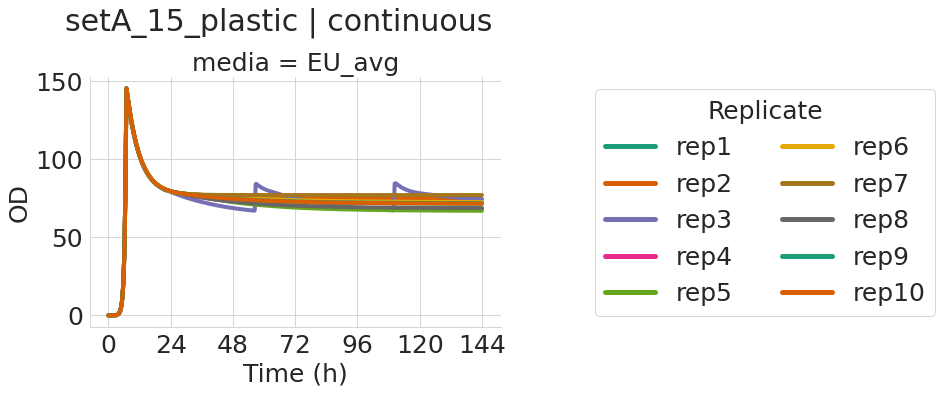

In [8]:
vz.plot_OD_over_time(storage=storage, simID='setA_15_plastic', replicates=rep_simID_df.columns.values, 
                     culture_type='continuous', media=['EU_avg'], style='facetgrid', save_fig=False)

1

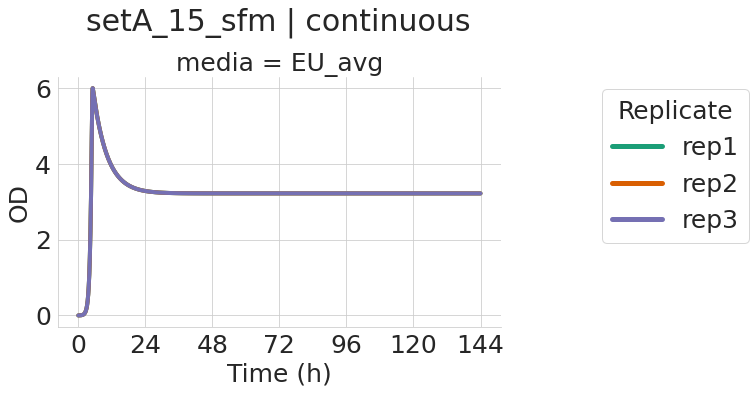

In [9]:
vz.plot_OD_over_time(storage=storage, simID='setA_15_sfm', replicates=['rep1', 'rep2', 'rep3'], 
                     culture_type='continuous', media=['EU_avg'], style='facetgrid', save_fig=False)

1

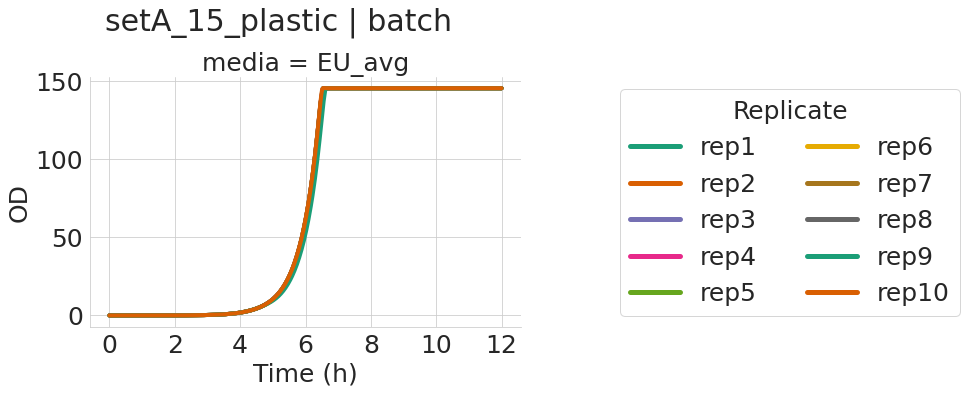

In [10]:
vz.plot_OD_over_time(storage=storage, simID='setA_15_plastic', replicates=rep_simID_df.columns.values, 
                     culture_type='batch', media=['EU_avg'], style='facetgrid', save_fig=False)